### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


**(1) What is the independent variable? What is the dependent variable?**

**Independent** variables are Congruent/Incongruent cathegories which corresponds to cases when a color of the words is the actual color writen or cases when a color of the words is DIFFERENT than the word written.

**Dependent** variable is measured time which can vary depending on various factors-

**(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.**

H0 = population mean of Congruent variable is equal to the mean of Incongruent variable 
$$  H_{0}: μ_{congruent} = μ_{incongruent}  $$
$$  H_{0} = null .  hypothesis  $$
$$  μ = population.mean  $$

H1 = population mean of Congruent variable is different than the mean of Incongruent variable
$$  H_{1}: μ_{congruent} \neq μ_{incongruent}  $$
$$  H_{1} = alternative .  hypothesis  $$
$$  μ = population.mean  $$

I expect I will perform the dependent t-test whose outcome is to answer questions if there is a statistically significant difference between the population means in two uncorrelated samples. 

Alpha will be set as 0.05.

Other requierments that the sample datasets fulfill for a t-test is that I have Independent variable with two categories Congruent and Incongruent, and dependent variable is continueos measurment of the time, both distributions should be normal and with the same variance.

Moreover, sample size is small, i.e. 24 per group and no information was given about distribution and population standard deviation. If we had more information about it, we could consider a different test.



**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [1]:
# Perform the analysis here

import pandas as pd
stroop = pd.read_csv("stroopdata.csv")

stroop.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


Measures of central tendencies: **mean** as a part of a summary table and **median** as a separate calculation
Measure of variability: **standard deviation - std** as a part of a summary table and **range** as a separate calculation

In [2]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Median:

In [3]:
print("Congruent:", stroop["Congruent"].median(), "Incongruent:", stroop["Incongruent"].median())

Congruent: 14.3565 Incongruent: 21.0175


Range:

In [4]:
minC = stroop["Congruent"].min()
minIC = stroop["Incongruent"].min()
maxC = stroop["Congruent"].max()
maxIC = stroop["Incongruent"].max()
RangeCongruent = maxC - minC
RangeIncongruent = maxIC - minIC
print("Range Congruent:", RangeCongruent, "Range Incongruent:", RangeIncongruent)

Range Congruent: 13.698 Range Incongruent: 19.568


**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

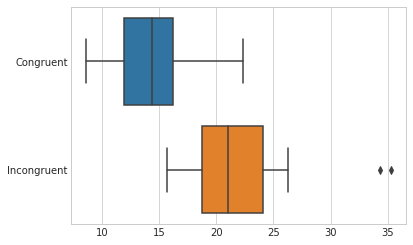

In [5]:
# Build the visualizations here
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
data = stroop
a = sns.boxplot(data=data, orient = "h")


Congruent variable has a lower and narower IQR than the Incongruent variable, mode is also lower in magnitude for Congruent variable. It is key to note down that Incongruent variable has two outliers in proximity of 35 seconds.


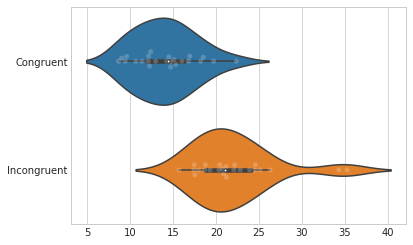

In [6]:
#melted = pd.melt(stroop, value_vars=['Congruent','Incongruent'])
#melted.head()
sns.swarmplot(data = stroop, orient = "h", color="w", alpha=.2);
sns.violinplot(data = stroop, orient = "h");



Violin and swarm plots when combined gives an better picture of how data is distributed and how dense is it along the distribution parts in comparison with box plots where(in box plots) that part of the information is "invisible".

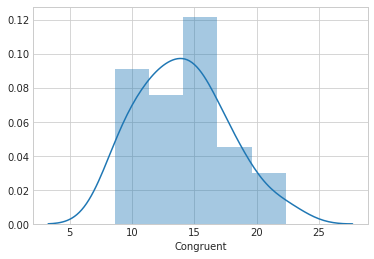

In [7]:
sns.distplot(stroop["Congruent"])

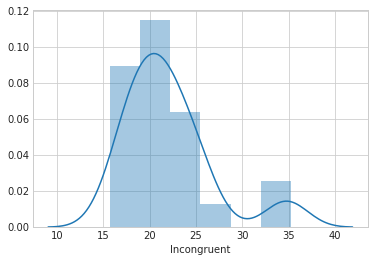

In [8]:
sns.distplot(stroop["Incongruent"]);

In the graphs above we see similar what we observe in the box plots but here it is more clear that Congruent category has a bit of a right skew and Incongruent has obvious outliers on the right side but normality could be assumed for the T-test

**(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?**

In [9]:

# Perform the statistical test here
## two distributions we will apply t-test on are:

size = stroop["Congruent"].size ## size of each sample groups
congruent = stroop["Congruent"]
incongruent = stroop["Incongruent"]


In [10]:
#1 difference between two observations
difference = incongruent - congruent

In [11]:
#2 mean difference
mean_difference = difference.mean()
mean_difference

7.9647916666666658

In [12]:
#3 standard deviation of differences
sd_difference = difference.std()
sd_difference


4.8648269103590556

In [13]:
#3 standard error of mean difference
import math

SEdifferences = sd_difference / math.sqrt(size)
SEdifferences

0.99302863477834058

In [14]:
#4 t-statistic<<<
T = mean_difference / SEdifferences
T

8.020706944109957

Calculated t-value is 8.0207

Specified alpha level is 0.05

24-1 = 23 degrees of freedom

t-value from the t-table is = 2.069

Calculated t-value is greater than the table value at p=0.05 and therefore we reject the null hypothesis by saying there is a statistically significant difference between the means of Congruent and Incongruent categories.

Results did match with my expectations due to the nature of the stroop effect and the theories I read before the project about the phenomena, i.e.:

Speed of Processing Theory: the interference occurs because words are read faster than colors are named.
Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words. (https://faculty.washington.edu/chudler/words.html)

Links:

https://plot.ly/python/t-test/ 

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

http://benalexkeen.com/comparative-statistics-in-python-using-scipy/

https://stackoverflow.com/questions/22611446/perform-2-sample-t-test

http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values